In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  2 19:06:34 2020

@author: nacho
"""
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
sns.set(color_codes=True)
import os, datetime
from collections import Counter
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as ticker

In [10]:
path = "/home/nacho/Documents/coronavirus/Data_Mexico"
os.chdir(os.path.join(path)) 
violencia_og = pd.read_csv("data/IDEFC_NM_oct2020.csv", encoding='utf-8')


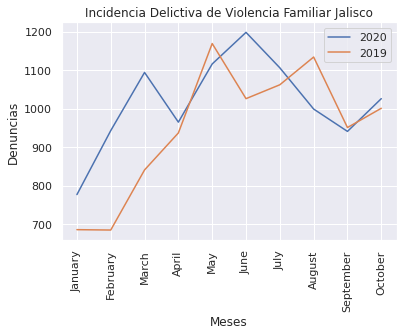

Total Jalisco 2020:  10165
Total Jalisco 2019:  9492
Porcentaje de incremento de Jalisco: 7.0901812052254485


In [12]:
#%%JALISCO
violencia_jalisco_2020 = violencia_og[(violencia_og['Entidad'] == 'Jalisco') &  (violencia_og['Tipo de delito'] == 'Violencia familiar') & (violencia_og['Año']== 2020) ]
violencia_jalisco_2020 = violencia_jalisco_2020[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre']]
violencia_jalisco_2020 = violencia_jalisco_2020.T
violencia_jalisco_2020.columns = ['denuncias']

violencia_jalisco_2019 = violencia_og[(violencia_og['Entidad'] == 'Jalisco') &  (violencia_og['Tipo de delito'] == 'Violencia familiar') & (violencia_og['Año']== 2019) ]
violencia_jalisco_2019 = violencia_jalisco_2019[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre']]
violencia_jalisco_2019 = violencia_jalisco_2019.T
violencia_jalisco_2019.columns = ['denuncias']

violencia_jalisco = pd.merge(violencia_jalisco_2020['denuncias'],
                             violencia_jalisco_2019['denuncias'], 
                             how='left', left_index=True,right_index=True)  
violencia_jalisco.index= pd.date_range('2000-01-01', freq='1M', periods=10).strftime('%d-%m-%y')
violencia_jalisco.index= pd.to_datetime(violencia_jalisco.index)
violencia_jalisco.columns = ['2020', '2019']

violencia_jalisco.index = violencia_jalisco.index.strftime('%B')
#plot
fig, ax = plt.subplots()
ax.plot(violencia_jalisco.index, violencia_jalisco['2020'].astype(int), label=2020)
ax.plot(violencia_jalisco.index, violencia_jalisco['2019'].astype(int), label=2019)
ax.set_ylabel("Denuncias")
ax.set_xlabel("Meses")
ax.set_title("Incidencia Delictiva de Violencia Familiar Jalisco")
plt.xticks(rotation='vertical')
ax.legend()
plt.show()
#porcentaje
print("Total Jalisco 2020: ", violencia_jalisco['2020'].astype(int).sum())
print("Total Jalisco 2019: ", violencia_jalisco['2019'].astype(int).sum())
print("Porcentaje de incremento de Jalisco:", (violencia_jalisco['2020'].astype(int).sum()/violencia_jalisco['2019'].astype(int).sum())*100-100)


Total Mexico 2020:  184462
Total Mexico 2019:  178400
Porcentaje de incremento de Mexico: 3.397982062780258


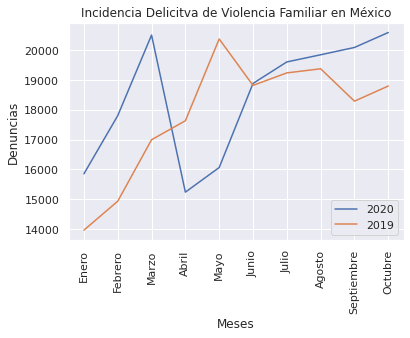

In [14]:
#%%MEXICO
violencia_mx_2020 = violencia_og[(violencia_og['Tipo de delito'] == 'Violencia familiar') & (violencia_og['Año']== 2020) ]
violencia_mx_2020 = violencia_mx_2020[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre']]
violencia_mx_2020.reset_index(drop=True, inplace=True)
violencia_mx_2020_suma = violencia_mx_2020[list(violencia_mx_2020)].astype(int).sum()

violencia_mx_2019 = violencia_og[(violencia_og['Tipo de delito'] == 'Violencia familiar') & (violencia_og['Año']== 2019) ]
violencia_mx_2019 = violencia_mx_2019[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre']]
violencia_mx_2019.reset_index(drop=True, inplace=True)
violencia_mx_2019_suma = violencia_mx_2019[list(violencia_mx_2019)].astype(int).sum()

#plot
fig, ax = plt.subplots()
ax.plot(violencia_mx_2020_suma.index, violencia_mx_2020_suma.astype(int), label=2020)
ax.plot(violencia_mx_2019_suma.index, violencia_mx_2019_suma.astype(int), label=2019)
ax.set_ylabel("Denuncias")
ax.set_xlabel("Meses")
ax.set_title("Incidencia Delicitva de Violencia Familiar en México")
plt.xticks(rotation='vertical')
ax.legend()
#porcentaje
print("Total Mexico 2020: ", violencia_mx_2020_suma.sum())
print("Total Mexico 2019: ", violencia_mx_2019_suma.sum())
print("Porcentaje de incremento de Mexico:", violencia_mx_2020_suma.sum()/violencia_mx_2019_suma.sum()*100-100)
